In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv("salary.csv")
df.head()

,Salary,Age,Experience,Highest_Degree,Designation,Upskilling_Certification_Courses
0,0,22,0,Degree,Intern,0
1,0,22,0,Degree,Intern,0
2,22000,24,2,Degree,Associates,1
3,0,23,1,Degree,Intern,0
4,48000,26,4,Degree,Manager,3


In [3]:
df.shape

(205, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Salary                            205 non-null    int64 
 1   Age                               205 non-null    int64 
 2   Experience                        205 non-null    int64 
 3   Highest_Degree                    205 non-null    object
 4   Designation                       205 non-null    object
 5   Upskilling_Certification_Courses  205 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 9.7+ KB


# Num vs Num

In [ ]:
# Target - salary - num

# Age - num

In [5]:
df[["Salary","Age"]].corr()

,Salary,Age
Salary,1.000000,0.607104
Age,0.607104,1.000000


In [ ]:
# Step -1 

# Checking the assumptions

# Normality
# Equal Variance

In [6]:
df["Salary"]

0          0
1          0
2      22000
3          0
4      48000
       ...  
200    18000
201        0
202        0
203    65000
204    61000
Name: Salary, Length: 205, dtype: int64

In [7]:
df["Age"]

0      22
1      22
2      24
3      23
4      26
       ..
200    23
201    22
202    22
203    37
204    35
Name: Age, Length: 205, dtype: int64

In [ ]:
# Num vs Num

In [ ]:
# Checking normality - shapiro test

# null - Data is normal    skew = 0
# Ater - Data is not normal skew != 0

In [ ]:
# Directionality - tow tailed

In [8]:
# Calculate test stats , p_value
# significance level = 0.05
stats.shapiro(df["Salary"])

ShapiroResult(statistic=0.9641101360321045, pvalue=4.521189475781284e-05)

In [ ]:
# sign = 0.05
# p_val = 0.000004

# since p_value is less than sign level, we can conclude 
# that data is not normaly distributed so we reject the null hypothesis

In [ ]:
# Checking normality for Age - shapiro test

# null - Data is normal    skew = 0
# Ater - Data is not normal skew != 0

In [ ]:
# Directionality - tow tailed

In [9]:
# Calculate test stats , p_value
# significance level = 0.05
stats.shapiro(df["Age"])

ShapiroResult(statistic=0.9254331588745117, pvalue=1.0746939338446282e-08)

In [ ]:
# sign_lvl = 0.05
# p_val = 0.000000001
# since p_val is less than sign_lvl, we conclude that data 
# is not normal and we reject null

In [ ]:
# Null - All samples have equal variance
# Alternate - Samples doesnot have equal variance

In [ ]:
# Directionality - 2

In [ ]:
# sign = 0.05
# stats.levene(sample1, sample2, sample3.....samplen)

In [10]:
stats.levene(df["Salary"], 
             df["Age"])

LeveneResult(statistic=326.19498641549933, pvalue=5.252192581360276e-54)

In [ ]:
# since p_value is less than sign level , we conclude that samples does not
# have equal variance and reject null hypothesis

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
sc = MinMaxScaler()
x = sc.fit_transform(df[["Salary","Age"]])
x

array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.2       , 0.05714286],
       [0.        , 0.02857143],
       [0.43636364, 0.11428571],
       [0.5       , 0.14285714],
       [0.19090909, 0.08571429],
       [0.16363636, 0.11428571],
       [0.13636364, 0.05714286],
       [0.39090909, 0.31428571],
       [0.47272727, 0.28571429],
       [0.86363636, 0.02857143],
       [0.26363636, 0.02857143],
       [0.2       , 0.02857143],
       [0.43636364, 0.31428571],
       [0.46363636, 0.34285714],
       [0.45454545, 0.37142857],
       [0.51818182, 0.4       ],
       [0.50909091, 0.42857143],
       [0.39090909, 0.4       ],
       [0.47272727, 0.45714286],
       [0.63636364, 0.4       ],
       [0.35454545, 0.14285714],
       [0.47272727, 0.62857143],
       [0.7       , 0.6       ],
       [0.73636364, 0.65714286],
       [0.77272727, 0.54285714],
       [1.        , 0.68571429],
       [0.69090909, 0.57142857],
       [0.72727273, 0.71428571],
       [0.

In [18]:
stats.levene(x[ : , 0], 
             x[ : , 1])

LeveneResult(statistic=14.922745860897253, pvalue=0.00013023205750093206)

In [ ]:
# As the assumption of normality and equal 
# variance is voilated we will have to do non parametric test

In [ ]:
# Assume that data is normally distributed and samples have equal variance

In [20]:
df[["Salary","Age"]].corr()

,Salary,Age
Salary,1.000000,0.607104
Age,0.607104,1.000000


In [ ]:
# Null - There is no relation b/w salary and age
# Alter - There is relation b/w Salary and Age

# Directionality - 2

In [19]:
stats.pearsonr(df["Salary"],df["Age"])

(0.6071040335127078, 4.937138646956397e-22)

In [ ]:
# sign = 0.05
# p_val = 0
# since P-val is less than sign lvl, 
# we can conclude that there is relation b/w salary and age


In [21]:
df[["Salary","Age"]].corr(method = "spearman")

,Salary,Age
Salary,1.000000,0.653025
Age,0.653025,1.000000


In [ ]:
# Null - There is no relation b/w salary and age
# Alter - There is relation b/w Salary and Age

# Directionality - 2

In [22]:
# test stats and p_value
stats.spearmanr(df["Salary"],df["Age"])

SpearmanrResult(correlation=0.6530246511033057, pvalue=2.6643121083087827e-26)

In [ ]:
# Significance level = 0.05
# P_value = 0.0

# Since p_val is less than sign lvl, we conclude that there is 
# significant relationship between salary and age and reject the null hypo

# Num vs Cat (2 Groups)

In [23]:
df.head()

,Salary,Age,Experience,Highest_Degree,Designation,Upskilling_Certification_Courses
0,0,22,0,Degree,Intern,0
1,0,22,0,Degree,Intern,0
2,22000,24,2,Degree,Associates,1
3,0,23,1,Degree,Intern,0
4,48000,26,4,Degree,Manager,3


In [24]:
df["Highest_Degree"].value_counts()

Degree     140
Masters     65
Name: Highest_Degree, dtype: int64

<AxesSubplot:xlabel='Highest_Degree', ylabel='Salary'>

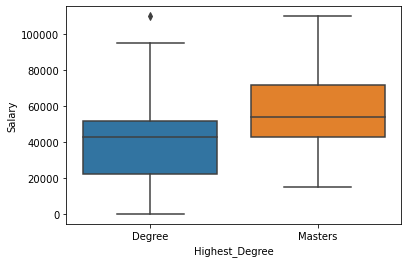

In [25]:
sns.boxplot(data=df, x = "Highest_Degree", y = "Salary")

In [ ]:
# step -1 
# Checking Assumptions
# Data is normal
# Samples have equal variance

In [ ]:
# Data is normal

In [26]:
degree =  df[ df["Highest_Degree"] == "Degree"]["Salary"]
masters = df[ df["Highest_Degree"] == "Masters"]["Salary"]

In [28]:
degree

0          0
1          0
2      22000
3          0
4      48000
       ...  
193    54000
200    18000
201        0
202        0
204    61000
Name: Salary, Length: 140, dtype: int64

In [27]:
# Normality - 
# null - Data is normal  skew = 0
# alter - Data is not normal skew != 0

stats.shapiro(df["Salary"])

ShapiroResult(statistic=0.9641101360321045, pvalue=4.521189475781284e-05)

In [29]:
stats.shapiro(degree)

ShapiroResult(statistic=0.9596090912818909, pvalue=0.0003864936006721109)

In [30]:
stats.shapiro(masters)

ShapiroResult(statistic=0.9436206221580505, pvalue=0.00516712199896574)

In [ ]:
# Since p_value is less than sign level we conclude that data is not normal
# and reject the null hypothesis

In [ ]:
# levene

# null - variance of samples are equal   var of degree = var of master 
# alter - Variance of samples are not equal

In [31]:
stats.levene(degree, masters)

LeveneResult(statistic=0.11716247840600362, pvalue=0.7324867489797675)

In [ ]:
# p_val = 0.73
# sign lvl = 0.05
# Since p_val is greater than sign lvl we conclude that the variance are equal
# and we fail to reject null hypo

In [ ]:
# Since assumption of normality is 
# voilated we will have to perform non para test

In [ ]:
# We assume data is normaly distributed and have equal variance


In [ ]:
# Frame hypothesis

# H0 :-  Avg salary of degree = Avg Sal of Masters, mu1 = mu2
# Ha :- Avg salary of degree != Avg Sal of Masters, mu1 != mu2

In [ ]:
# Directionality - 2

In [32]:
# Calculate test stats, p_value
stats.ttest_ind(df["Salary"], df["Highest_Degree"])

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [33]:
stats.ttest_ind(degree, masters)

Ttest_indResult(statistic=-5.3537310995406715, pvalue=2.3202430485928605e-07)

In [ ]:
sing = 0.05
P_val = 0.0

# Since P-val is less than sign lvl we can conclude that there's difference 
# b/w avg sal of masters and degree and we reject null hy

In [ ]:
# Frame hypothesis

# H0 :-  Avg salary of degree = Avg Sal of Masters, mu1 = mu2
# Ha :- Avg salary of degree != Avg Sal of Masters, mu1 != mu2

In [ ]:
# test stats , P-val

In [34]:
stats.mannwhitneyu(degree,masters)  # non parametric

MannwhitneyuResult(statistic=2670.0, pvalue=1.941021108313548e-06)

In [35]:
stats.ttest_ind(degree, masters)

Ttest_indResult(statistic=-5.3537310995406715, pvalue=2.3202430485928605e-07)

In [36]:
stats.f_oneway(degree,masters)

F_onewayResult(statistic=28.66243668618897, pvalue=2.320243048592841e-07)

# Num vs CAT(> 2)

In [37]:
df[["Salary","Designation"]]

,Salary,Designation
0,0,Intern
1,0,Intern
2,22000,Associates
3,0,Intern
4,48000,Manager
...,...,...
200,18000,Associates
201,0,Intern
202,0,Intern
203,65000,Manager


In [38]:
df["Designation"].value_counts()

Manager           88
Associates        58
Senior Manager    47
Intern            12
Name: Designation, dtype: int64

In [ ]:
# Check Assumptions
# - Normality
# - Equal Var

In [41]:
Intern = df[df["Designation"] == "Intern"]["Salary"]
Manager = df[df["Designation"] == "Manager"]["Salary"]
Associates = df[df["Designation"] == "Associates"]["Salary"]
Senior_manager = df[df["Designation"] == "Senior Manager"]["Salary"]

In [47]:
stats.shapiro(df["Salary"])

ShapiroResult(statistic=0.9641101360321045, pvalue=4.521189475781284e-05)

In [49]:
stats.shapiro(Intern)

C:\Users\ClassRoom 2\anaconda3\lib\site-packages\scipy\stats\morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


ShapiroResult(statistic=1.0, pvalue=1.0)

In [50]:
stats.shapiro(Manager)

ShapiroResult(statistic=0.9585660696029663, pvalue=0.006655644625425339)

In [51]:
stats.shapiro(Senior_manager)

ShapiroResult(statistic=0.9352521896362305, pvalue=0.011823092587292194)

In [52]:
stats.shapiro(Associates)

ShapiroResult(statistic=0.6575738191604614, pvalue=2.308056801236802e-10)

In [ ]:
# Data is not normaly distributed

In [53]:
# levene

stats.levene(df["Salary"],df["Designation"])

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [54]:
# levene

stats.levene(Intern,Manager,Senior_manager,Associates)

LeveneResult(statistic=23.504488225573883, pvalue=4.400885171308711e-13)

In [ ]:
# We assume data is normaly distributed and has equal variance

In [ ]:
# Null :- avg sal of Intern = Avg sal of Associates = Avg Sal of Manager = Avg sal of senior manager
# Alter :- At least one of them is not equal

In [55]:
# Stats , P_values
stats.f_oneway(Intern,Manager,Senior_manager,Associates)

F_onewayResult(statistic=219.5159648437038, pvalue=3.758582121942665e-63)

In [ ]:
# sign = 0.05
# P_val = 0.0
# since P_val is less than sign lvl we conclude that avg sal 
# of one of them is different and reject null

# Designation has significant effect on predicting salary

In [59]:
from statsmodels.stats import multicomp as mc
post_hoc = mc.MultiComparison(df["Salary"], df["Designation"])
post_hoc.tukeyhsd().summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Associates,Intern,-23706.8966,0.0,-34037.1435,-13376.6496,True
Associates,Manager,26531.7398,0.0,21022.5543,32040.9254,True
Associates,Senior Manager,54356.9332,0.0,47964.0315,60749.8349,True
Intern,Manager,50238.6364,0.0,40214.7913,60262.4814,True
Intern,Senior Manager,78063.8298,0.0,67528.3879,88599.2717,True
Manager,Senior Manager,27825.1934,0.0,21940.2415,33710.1454,True


In [ ]:
# u1 = u2
# null :- avg sal of ass = avg sal of intern  reject
#     avg sal of ass != avg sal of intern

In [ ]:
#kruskal

In [ ]:
# Null :- avg sal of Intern = Avg sal of Associates = Avg Sal of Manager = Avg sal of senior manager
# Alter :- At least one of them is not equal

In [60]:
# stats , p_values
stats.kruskal(Intern,Manager,Senior_manager,Associates)

KruskalResult(statistic=146.52478949449008, pvalue=1.480389678559127e-31)

In [ ]:
# sign = 0.05
# p_values = 0
# since p_val is less than sign level at least of 

In [ ]:
# Cat vs Cat  (No Assumption)
# Non-Parametric

In [61]:
df.head()

,Salary,Age,Experience,Highest_Degree,Designation,Upskilling_Certification_Courses
0,0,22,0,Degree,Intern,0
1,0,22,0,Degree,Intern,0
2,22000,24,2,Degree,Associates,1
3,0,23,1,Degree,Intern,0
4,48000,26,4,Degree,Manager,3


In [ ]:
# Frame Hypothesis
H0 :- There's no relation b/w highest degree and Designation
Ha :- There's relation b/w highest degree and designation

In [63]:
pd.crosstab(df["Highest_Degree"], df["Designation"],margins = True)

Designation,Associates,Intern,Manager,Senior Manager,All
Highest_Degree,,,,,
Degree,50,12,54,24,140
Masters,8,0,34,23,65
All,58,12,88,47,205


In [64]:
stats.chi2_contingency(pd.crosstab(df["Highest_Degree"], df["Designation"]))

(22.561305807178876,
 4.984302332533709e-05,
 3,
 array([[39.6097561 ,  8.19512195, 60.09756098, 32.09756098],
        [18.3902439 ,  3.80487805, 27.90243902, 14.90243902]]))

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;">In a library 50 books are selected at random.On an average 1 out of 10 books is a statistics book. .

i) Probability of getting exactly 3 statistics book.

ii) Probability of getting atleast 3 statistics book.

iii) Probability of getting atmost 3 statistics book.

iv) Probability of getting between 3 and 10 statistics book.



In [65]:
stats.norm.isf(0.025)  # 95 - 

1.9599639845400545

In [67]:
stats.t.isf(0.025)

TypeError: _parse_args() missing 1 required positional argument: 'df'